In [1]:
#!/usr/bin/env python3

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import f1_score

def plot_cfm_multiple(targets, outputs):
    # Get the confusion matrix
    cf_matrix = confusion_matrix(targets, outputs)

    # Number of classes
    num_classes = len(np.unique(targets))

    # Initialize variables for micro F1 score
    micro_tp = 0  # True Positives
    micro_fp = 0  # False Positives
    micro_fn = 0  # False Negatives

    # Initialize variables for macro F1 score
    macro_f1_scores = []

    for class_label in range(num_classes):
        # Calculate class-specific true positives, false positives, and false negatives
        class_tp = np.sum((targets == class_label) & (outputs == class_label))
        class_fp = np.sum((targets != class_label) & (outputs == class_label))
        class_fn = np.sum((targets == class_label) & (outputs != class_label))

        # Update micro F1 variables
        micro_tp += class_tp
        micro_fp += class_fp
        micro_fn += class_fn

        # Calculate class-specific precision and recall
        class_precision = class_tp / (class_tp + class_fp)
        class_recall = class_tp / (class_tp + class_fn)

        # Calculate class-specific F1 score
        class_f1 = 2 * (class_precision * class_recall) / (class_precision + class_recall)

        macro_f1_scores.append(class_f1)

    print("Micro TP:", micro_tp)
    print("Micro FP:", micro_fp)
    print("Micro FN:", micro_fn)

    # Calculate micro precision and recall
    micro_precision = micro_tp / (micro_tp + micro_fp)
    micro_recall = micro_tp / (micro_tp + micro_fn)

    # Calculate micro F1 score
    micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

    # Calculate macro F1 score by taking the average of class-specific F1 scores
    macro_f1 = np.mean(macro_f1_scores)

    group_names = ["real {}, pred {}".format(x, y) for x in range(num_classes) for y in range(num_classes)]

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues", cbar=False)
    # sns.heatmap(cf_matrix, cmap="Blues")

    plt.text(
        1.75,
        -1,
        f"Micro F1 ={micro_f1*100:.2f}%\nMacro F1 = {macro_f1*100:.2f}%",
        ha="center",
        va="center",
        rotation=0,
        size=15,
    )
    # create extra space on the top
    plt.subplots_adjust(top=0.6)

    # # hide numeric scale

    plt.ylabel("True label")
    plt.xlabel("Predicted label")

    # show image
    plt.show()

def plot_confusion_matrix(targets, outputs):
    # Get the confusion matrix
    cf_matrix = confusion_matrix(targets, outputs, labels=[1, 0])

    # Compute precision, recall and F1
    accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / np.sum(cf_matrix)
    precision = cf_matrix[0][0] / (cf_matrix[0][0] + cf_matrix[1][0])
    recall = cf_matrix[0][0] / (cf_matrix[0][0] + cf_matrix[0][1])
    F1 = 2 * precision * recall / (precision + recall)

    group_names = [
        "True Positive\n(real 1, predicted 1)",
        "False Negative\n(real 1, predicted 0)",
        "False Positive\n(real 0, predicted 1)",
        "True Negative\n(real 0, predicted 0)",
    ]
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    # hide numeric scale
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues", cbar=False)

    plt.text(
        2,
        -1,
        f"Acc = (TP+TN)/(TP+TN+FP+FN) = {accuracy*100:.2f}%\nPrecision = TP/(TP+FP) = {precision*100:.2f}%\nRecall = TP/(TP+FN) = {recall*100:.2f}%\nF1 = 2*P*R/(P+R) = {2*precision*recall/(precision+recall)*100:.2f}%",
        ha="right",
        va="center",
        rotation=0,
        size=15,
    )
    # create extra space on the top
    plt.subplots_adjust(top=0.5)


    plt.ylabel("True label")
    plt.xlabel("Predicted label")

    # swap 0 and 1 on axis labels
    plt.xticks([0.5, 1.5], [1, 0], ha="center")
    plt.yticks([0.5, 1.5], [1, 0], va="center")
    # show image
    plt.show()

/tmp/ipykernel_165243/2915447707.py:94: RuntimeWarning: invalid value encountered in scalar divide
  precision = cf_matrix[0][0] / (cf_matrix[0][0] + cf_matrix[1][0])


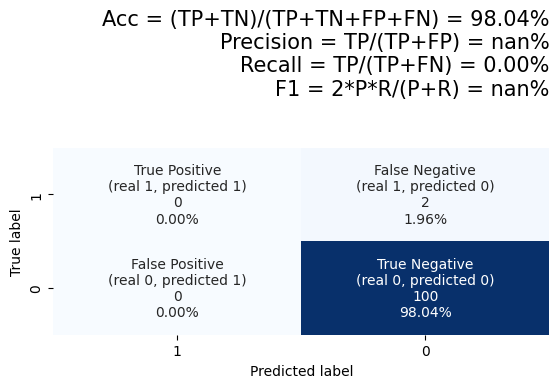

In [16]:
targets = [1, 1] + [0] * 100
outputs = [0, 0] + [0] * 100

plot_confusion_matrix(targets, outputs)


Micro TP: 13
Micro FP: 3
Micro FN: 3


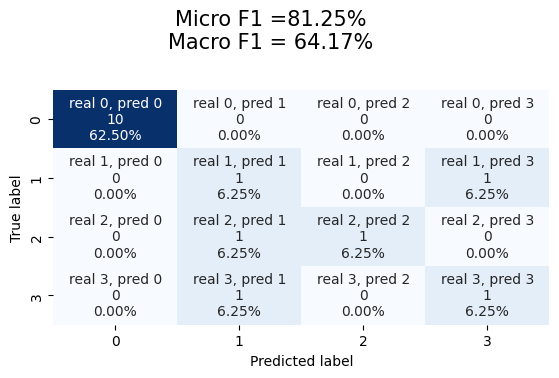

In [17]:
targets = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 3])
outputs = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 1, 3, 1])

plot_cfm_multiple(targets, outputs)